In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [232]:
df = pd.read_csv("/home/joswin_dsouza/Cleveland_Heart_Disease/heart_disease_uci.csv")

df.sample(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
88,89,53,Female,Cleveland,asymptomatic,138.0,234.0,False,lv hypertrophy,160.0,False,0.0,upsloping,0.0,normal,0
322,323,36,Male,Hungary,non-anginal,150.0,160.0,False,normal,172.0,False,0.0,NaN,NaN,NaN,0
399,400,48,Female,Hungary,asymptomatic,150.0,227.0,False,normal,130.0,True,1.0,flat,NaN,NaN,0
657,658,56,Male,Switzerland,asymptomatic,120.0,0.0,False,st-t abnormality,148.0,False,0.0,flat,NaN,NaN,2
523,524,58,Male,Hungary,non-anginal,130.0,213.0,False,st-t abnormality,140.0,False,0.0,NaN,NaN,fixed defect,1
293,294,63,Male,Cleveland,asymptomatic,140.0,187.0,False,lv hypertrophy,144.0,True,4.0,upsloping,2.0,reversable defect,2
736,737,63,Male,VA Long Beach,asymptomatic,170.0,177.0,False,normal,84.0,True,2.5,downsloping,NaN,NaN,4
396,397,48,Female,Hungary,non-anginal,120.0,195.0,False,normal,125.0,False,0.0,NaN,NaN,NaN,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
663,664,57,Male,Switzerland,asymptomatic,140.0,0.0,NaN,normal,100.0,True,0.0,NaN,NaN,fixed defect,3


In [233]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [235]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [236]:
df.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

In [237]:
x_train_df = df.drop(columns=['id','dataset'])
x_train_df.sample(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
631,51,Male,asymptomatic,140.0,0.0,False,normal,60.0,False,0.0,flat,NaN,normal,2
770,55,Male,non-anginal,120.0,0.0,False,st-t abnormality,125.0,True,2.5,flat,NaN,reversable defect,1
694,62,Male,asymptomatic,115.0,0.0,NaN,normal,72.0,True,-0.5,flat,NaN,normal,1
458,54,Male,asymptomatic,150.0,365.0,False,st-t abnormality,134.0,False,1.0,upsloping,NaN,NaN,0
270,61,Male,asymptomatic,140.0,207.0,False,lv hypertrophy,138.0,True,1.9,upsloping,1.0,reversable defect,1


In [238]:
categorical_cols = [col for col in x_train_df.columns if x_train_df[col].nunique() < 10]
numeric_cols = [col for col in x_train_df.columns if col not in categorical_cols]


print(numeric_cols)
print(categorical_cols)

['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']


In [239]:
x_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


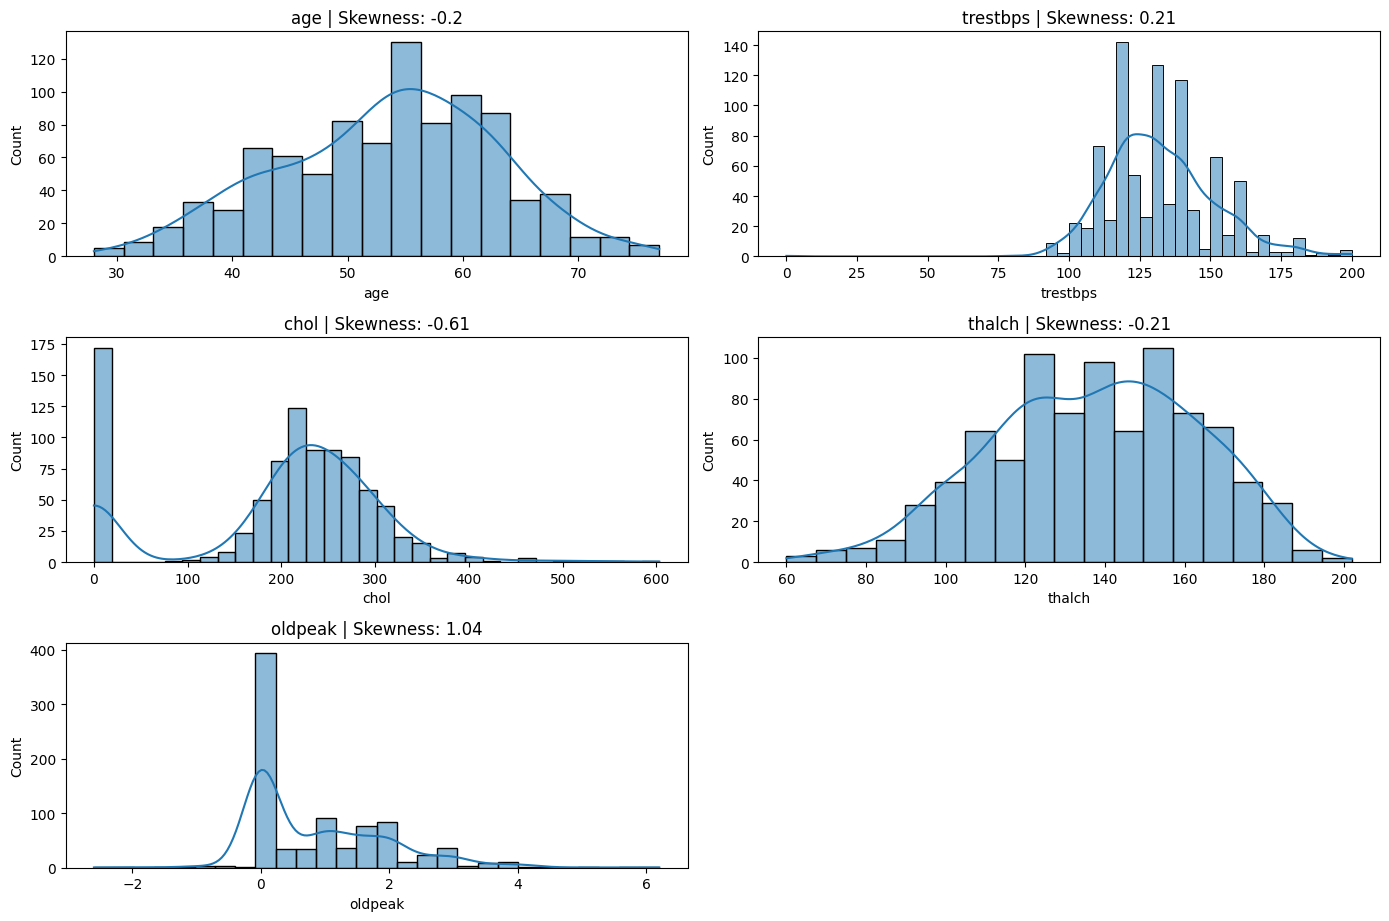

In [240]:
plt.figure(figsize=(14, len(numeric_cols) * 3))
for idx, feature in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, idx)
    sns.histplot(x_train_df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(x_train_df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

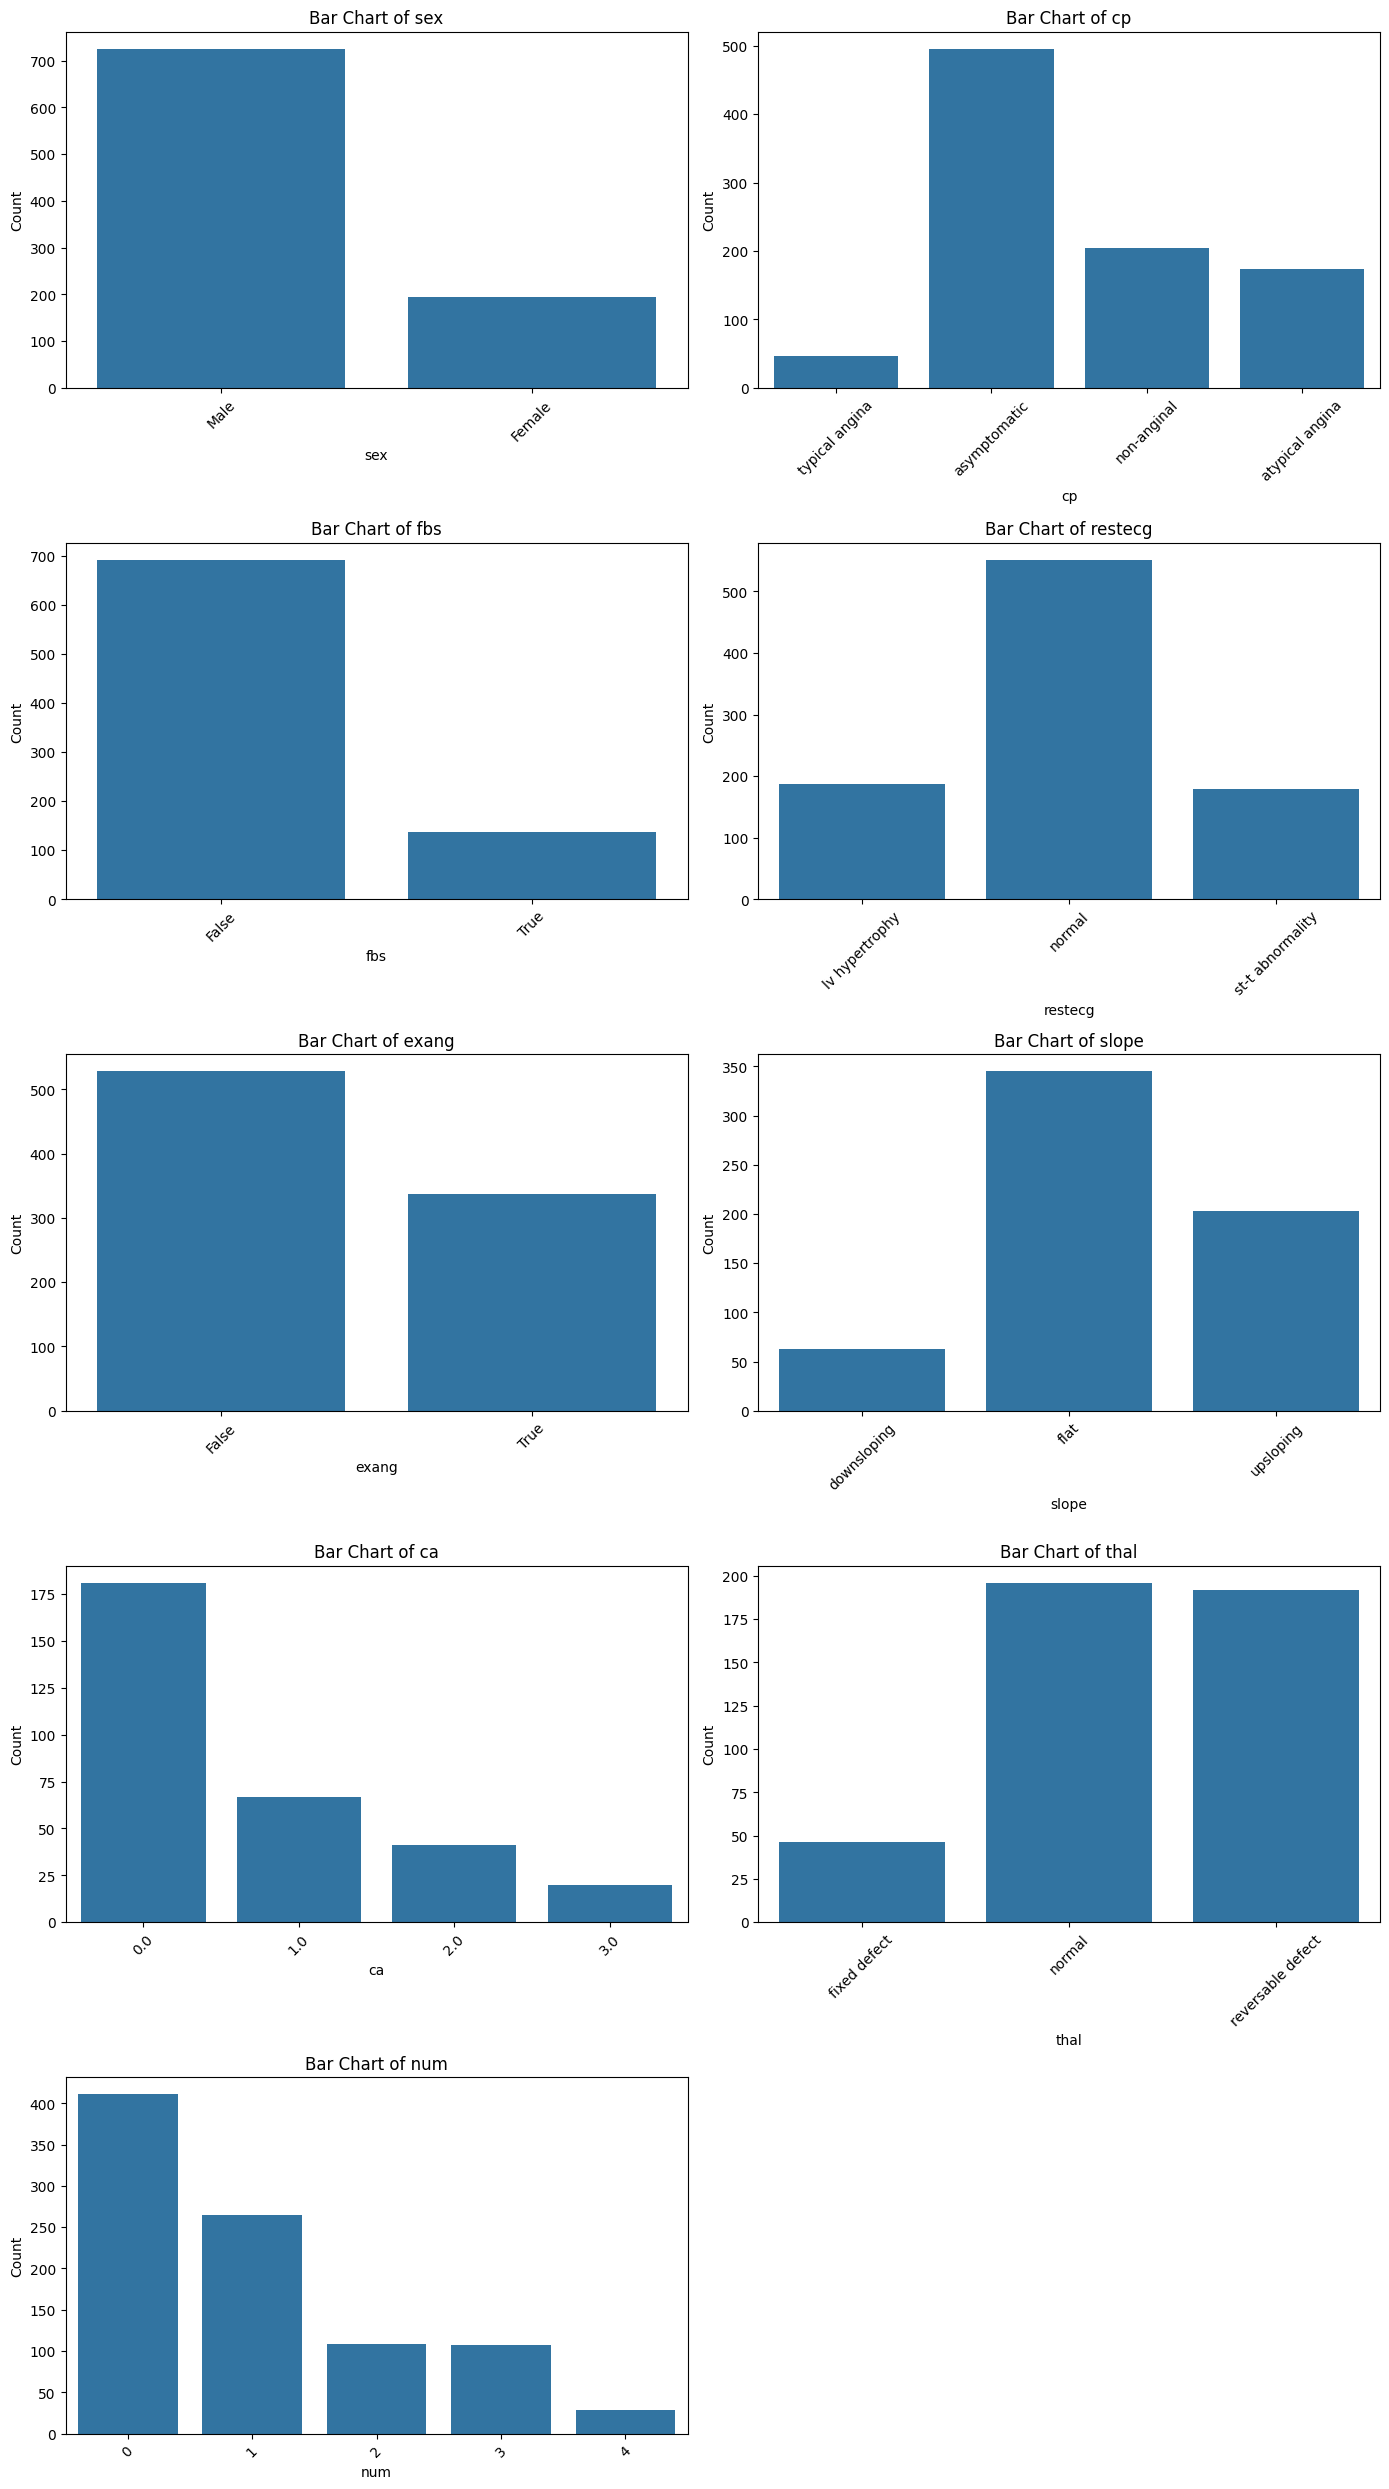

In [241]:
plt.figure(figsize=(14, 5 * len(categorical_cols)))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 2, i)
    sns.countplot(x=x_train_df[col])
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


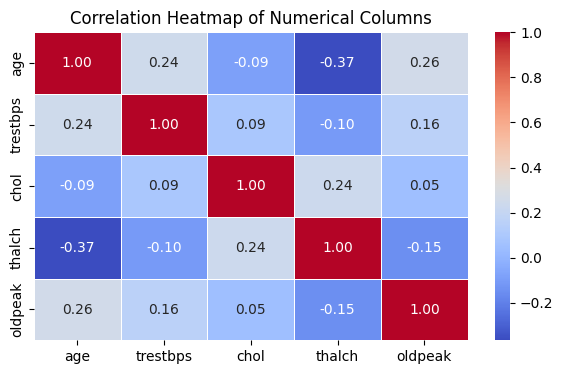

In [242]:
corr = x_train_df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [243]:
# Handling Missing Values

# fbs -> replaces with mode
x_train_df['fbs'].fillna(x_train_df['fbs'].mode()[0], inplace= True)

# restecg -> replaces with mode
x_train_df['restecg'].fillna(x_train_df['restecg'].mode()[0], inplace= True)

# exang -> replaces with mode
x_train_df['exang'].fillna(x_train_df['exang'].mode()[0], inplace= True)


/tmp/ipykernel_1665/2606014029.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train_df['fbs'].fillna(x_train_df['fbs'].mode()[0], inplace= True)
/tmp/ipykernel_1665/2606014029.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train_df['fbs'].fillna(x_train_df['fbs'].mode()[0], inplace= True)
/tmp/ipy

In [244]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


# chol with 0.0 which biologically does not make sense will also be imputed.
x_train_df['chol'] = x_train_df['chol'].replace(0.0, np.nan)

scaler = StandardScaler()
scaled = scaler.fit_transform(x_train_df[numeric_cols])

imputer = KNNImputer(n_neighbors= 5, weights="uniform")
imputed_scaled = imputer.fit_transform(scaled)
imputed = scaler.inverse_transform(imputed_scaled)

x_train_df[numeric_cols] = imputed


In [245]:
x_train_df.isna().sum()

# slope -> replaced with mode
x_train_df['slope'].fillna(x_train_df['slope'].mode()[0], inplace= True)

# for ca and thal, I am going to use target-aware KNN imputation
# mapping thal to its label
thal_mapping = {"normal" : 1, "reversable defect" : 2, "fixed defect" : 3}
x_train_df['thal'] = x_train_df['thal'].replace(thal_mapping).astype(float)

impute_cols = ['age', 'trestbps', 'chol', 'thalch', 'ca', 'thal', 'num']
ca_thal_imputer = KNNImputer(n_neighbors=5)
ca_thal_imputed = ca_thal_imputer.fit_transform(x_train_df[impute_cols])

x_train_df[impute_cols] = ca_thal_imputed

x_train_df['ca'] = x_train_df['ca'].round().astype(int)
x_train_df['thal'] = x_train_df['thal'].round().astype(int)


/tmp/ipykernel_1665/2779390425.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train_df['slope'].fillna(x_train_df['slope'].mode()[0], inplace= True)
/tmp/ipykernel_1665/2779390425.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train_df['thal'] = x_train_df['thal'].replace(thal_mapping)

In [246]:
target = x_train_df['num']
x_train_df = x_train_df.drop(columns=['num'])
categorical_cols = [col for col in x_train_df.columns if x_train_df[col].nunique() < 10]
numeric_cols = [col for col in x_train_df.columns if col not in categorical_cols]

print(numeric_cols)
print(categorical_cols)

['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [247]:
# Label Encoding the Remaining Catgeorical Columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    x_train_df[col] = le.fit_transform(x_train_df[col].astype(str))

# Converting unrequired float types into Integers
x_train_df['age'] = x_train_df['age'].round().astype(int)
x_train_df['chol'] =x_train_df['chol'].round().astype(int)
x_train_df['trestbps'] = x_train_df['trestbps'].round().astype(int)

x_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    int64  
 4   chol      920 non-null    int64  
 5   fbs       920 non-null    int64  
 6   restecg   920 non-null    int64  
 7   thalch    920 non-null    float64
 8   exang     920 non-null    int64  
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    int64  
 11  ca        920 non-null    int64  
 12  thal      920 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 93.6 KB


In [248]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encode_cols = ['cp', 'restecg', 'slope', 'thal']

ohe = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False
)


# Fit + transform TRAIN data only
X_train_ohe = ohe.fit_transform(x_train_df[one_hot_encode_cols])

# Convert to DataFrame (optional but recommended)
ohe_cols = ohe.get_feature_names_out(one_hot_encode_cols)
X_train_ohe = pd.DataFrame(
    X_train_ohe,
    columns=ohe_cols,
    index=x_train_df.index
)

# Replace original columns
x_train_df = pd.concat(
    [x_train_df.drop(columns=one_hot_encode_cols), X_train_ohe],
    axis=1
)


In [249]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

x_train_df[numeric_cols] = sc.fit_transform(x_train_df[numeric_cols])


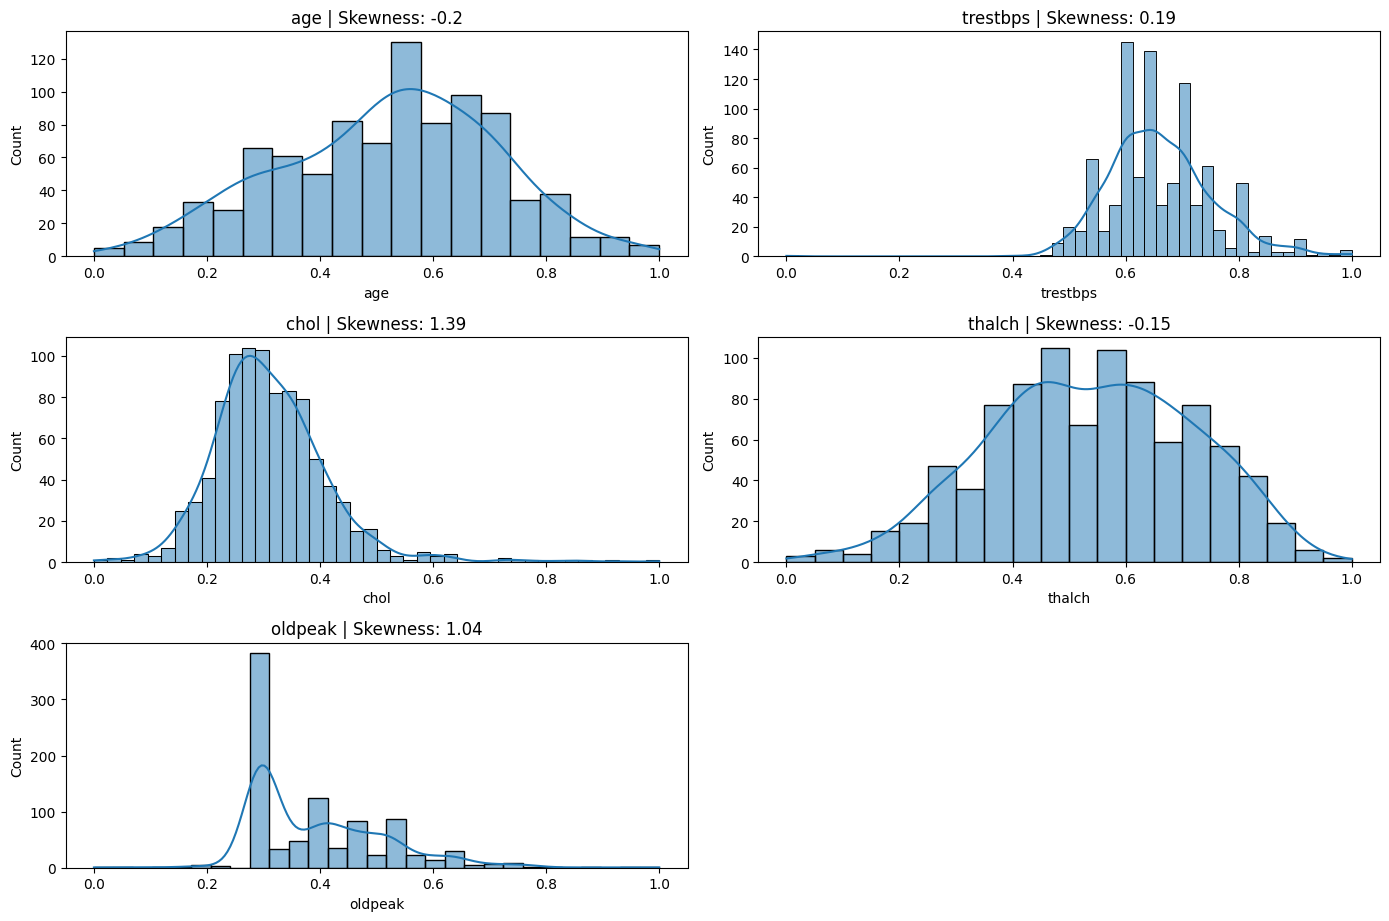

In [250]:
# Post Imputation and data handling
plt.figure(figsize=(14, len(numeric_cols) * 3))
for idx, feature in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, idx)
    sns.histplot(x_train_df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(x_train_df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

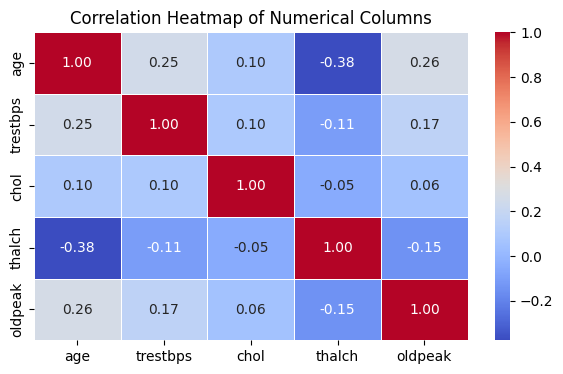

In [251]:
corr = x_train_df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [252]:
# Since I am performing Binary Classfication, I am converting all the multiclasses such as (1-4) 
# to 1 i,e has a heart disease and 0 as 0 i.e No heart disease.
target = target.apply(lambda x : 0 if x == 0 else 1)

In [253]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x_train_df, target, test_size=0.2, random_state= 42)

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8260869565217391

Confusion matrix:
 [[62 13]
 [19 90]]

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.79        75
           1       0.87      0.83      0.85       109

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184



In [255]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
    max_features="sqrt"
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.842391304347826

Confusion matrix:
 [[63 12]
 [17 92]]

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81        75
           1       0.88      0.84      0.86       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

